<a href="https://colab.research.google.com/github/nitanurqarinah/alia/blob/main/Tugas_Minggu_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

# Gambar Grafik Pertama
Frekuensi 1800 Mhz dengan 3 area : urban, open, sub urban

In [3]:
f = 1800 #Mhz
tower=80 #meter
user=1.5 #meter
dmin = 200 #meter
dmax = 700 #meter
N = 200 
d = np.random.randint(dmin,dmax,N)

LpUrban = cos(f,'urban',tower,user,d)
LpSuburban = cos(f,'suburban',tower,user,d)
LpOpen = cos(f,'open',tower,user,d)

d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

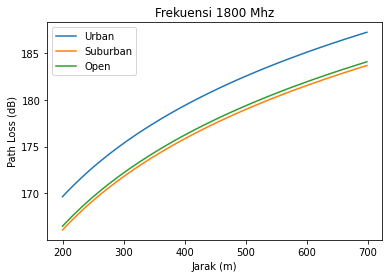

In [4]:
plt.figure()
plt.plot(d_sort,Urban_sort,label='Urban')
plt.plot(d_sort,Suburban_sort,label='Suburban')
plt.plot(d_sort,Open_sort,label='Open')
plt.legend()
plt.title('Frekuensi 1800 Mhz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

# Gambar Grafik Kedua
Area Urban dengan 3 Frekuensi (Mhz) yang berbeda : 700, 900, 1800

In [5]:
tower=80 #meter
user=1.5 #meter
dmin = 200 #meter
dmax = 700 #meter
N = 200 
d = np.random.randint(dmin,dmax,N)

LpUrban1 = cos(700,'urban',tower,user,d)
LpUrban2 = cos(900,'suburban',tower,user,d)
LpUrban3 = cos(1800,'open',tower,user,d)

d_sort=d[np.argsort(d)]
Urban1_sort=LpUrban1[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

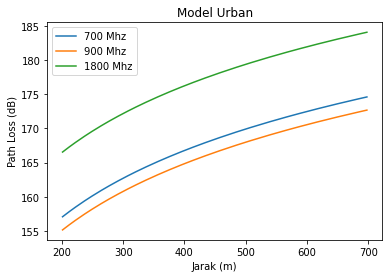

In [6]:
plt.figure()
plt.plot(d_sort,Urban1_sort,label='700 Mhz')
plt.plot(d_sort,Urban2_sort,label='900 Mhz')
plt.plot(d_sort,Urban3_sort,label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()